In [2]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401
from patato.useful_utilities import add_axis_label

%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}


plt.style.use(["science", "nature", "no-latex"])

matplotlib.rcParams["font.sans-serif"] = ["Arial"]
matplotlib.rcParams["figure.constrained_layout.use"] = True

In [3]:
if not os.path.exists("../data/reflectance/intermediate_results.npz"):
    !python '01sim_reflectance.py'
reflectance_information = np.load("../data/reflectance/intermediate_results.npz")

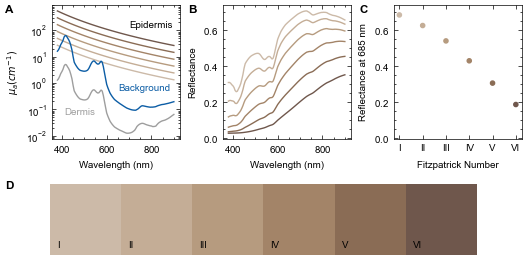

In [4]:
super_fig = plt.figure(figsize=(5.25, 5.25 / 3 + 5.25 / 6))
fig, subfigb = super_fig.subfigures(2, height_ratios=[2, 1])
ax_mua, ax1, ax2 = fig.subplots(1, 3)

# subfig_mua, subfiga = fig.subfigures(1, 2, width_ratios=[1, 2])
# subfigb = plt.figure()
axes = [ax1, ax2]
ax = subfigb.subplots()

# Make rectangles with the corresponding colour and "Fitzpatrick type"
i = 0
for s in reflectance_information["rgbs"]:
    n = reflectance_information["fp"][i]
    patch = matplotlib.patches.Rectangle((i, 0), 1, 1, facecolor=s)
    ax.add_patch(patch)
    ax.annotate(n, (0.1 + i, 0.1))
    i += 1

ax.axis("off")
ax.axis("equal")
ax.set_xlim([0, 6])

# Plot the reflectance as a function of wavelength
i = 0
for r in reflectance_information["reflectances"]:
    n = reflectance_information["fp"][i]
    rgb = reflectance_information["rgbs"][i]
    axes[0].plot(reflectance_information["wavelengths"], r, c=rgb, label=n)
    i += 1
axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Reflectance")

rgb = reflectance_information["rgbs"]
refl_685 = reflectance_information["reflectances_685"]
axes[1].scatter(range(1, 7), refl_685, c=rgb)
axes[1].set_xticks(range(1, 7), reflectance_information["fp"])

axes[1].set_xlabel("Fitzpatrick Number")
axes[1].set_ylabel("Reflectance at 685 nm")  # at 685 nm

axes[1].sharey(axes[0])

# ax_mua = subfig_mua.subplots()

for i in range(6):
    ax_mua.semilogy(
        reflectance_information["wavelengths"],
        reflectance_information["epidermis_mua"][i],
        c=rgb[i],
        label=reflectance_information["fp"][i],
    )
ax_mua.semilogy(
    reflectance_information["wavelengths"],
    reflectance_information["dermis_mua"][0],
    c="C6",
    label="Dermis",
)
ax_mua.semilogy(
    reflectance_information["wavelengths"],
    reflectance_information["background_mua"][0],
    c="C7",
    label="Background",
)

ax_mua.set_ylabel(r"$\mu_a (cm^{-1})$")
ax_mua.annotate("Dermis", (550, 0.06), xycoords="data", c="C6", ha="right")
ax_mua.annotate("Background", (650, 0.5), xycoords="data", c="C7", ha="left")
ax_mua.annotate("Epidermis", (800, 120), xycoords="data", c="k", ha="center")
ax_mua.set_xlabel(r"Wavelength (nm)")

# # Now add lettering

add_axis_label(ax_mua, "A")
add_axis_label(axes[0], "B")
add_axis_label(axes[1], "C")
add_axis_label(ax, "D")  # , axes[1], ax])

# # Adjust the y axis labels
subfigb.align_labels()
fig.align_labels()

axes[1].set_xticks([], [], minor=True)

super_fig.savefig("../figures/figure_000.png", dpi=300)
super_fig.savefig("../figures/figure_000.pdf", dpi=300)
plt.show()